In [73]:
#!pip install tensorflow

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import tabpy_client
import numpy as np
import tensorflow

In [75]:
stroke_df = pd.read_csv(os.path.join('Resources/healthcare-dataset-stroke-data.csv'))
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [76]:
#ID column is not necessary. Drop
stroke_df = stroke_df.drop(['id'], axis = 1)
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


201 rows of NA for bmi column only. Consider Drop NA but do complete data exploration first.

In [77]:
#Checking for nulls
print(stroke_df.isna().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [78]:
#Checking number of entries, data types
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [79]:
#Value counts for hypertension column to ensure only two choices
stroke_df["hypertension"].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [80]:
#Value counts for heart diseease column to ensure only two choices
stroke_df["heart_disease"].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [81]:
#Value counts for stroke column to ensure only two choices
stroke_df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [82]:
#Only 249 patients with stroke. How many will we lose if we Drop NA for the bmi column?
bmi_null_stroke = stroke_df.loc[(stroke_df['bmi'].isna() == True) & (stroke_df['stroke'] == 1)]
len(bmi_null_stroke)

40

In [83]:
#Check the value counts of all columns with datatype 'object' for a guide to encoding needs
counts = stroke_df.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    stroke_df[counts]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

counts
column         value                  
Residence_type Rural              2514
               Urban              2596
ever_married   No                 1757
               Yes                3353
gender         Other                 1
               Male               2115
               Female             2994
smoking_status smokes              789
               formerly smoked     885
               Unknown            1544
               never smoked       1892
work_type      Never_worked         22
               Govt_job            657
               children            687
               Self-employed       819
               Private            2925

In [84]:
#Examining age column
stroke_df.sort_values(by=['age']).head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3295,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3618,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
4021,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
3968,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0


Dropped the "Other" in the "Gender" column

In [85]:
#Children stroke count
children_stroke = stroke_df.loc[(stroke_df['age'] < 17) & (stroke_df['stroke'] == 1)]
len(children_stroke)

2

In [86]:
#Removing children from the dataset

no_children_df = stroke_df[stroke_df.age > 16]
no_children_df.sort_values(by=['age'])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
395,Female,17.0,0,0,No,Private,Urban,87.52,39.2,never smoked,0
3777,Female,17.0,0,0,No,Private,Rural,68.66,35.1,never smoked,0
4611,Female,17.0,0,0,No,Never_worked,Urban,78.08,44.9,never smoked,0
3256,Female,17.0,0,0,No,Private,Urban,89.58,22.8,Unknown,0
2128,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
4452,Female,82.0,1,0,Yes,Private,Urban,115.71,31.1,formerly smoked,0
42,Male,82.0,0,1,Yes,Private,Urban,144.90,26.4,smokes,1
2314,Male,82.0,0,0,Yes,Private,Urban,89.83,24.7,smokes,0
32,Female,82.0,1,0,Yes,Self-employed,Urban,196.92,22.2,never smoked,1


In [87]:
#Ensure children is no longer listed as a work type
no_children_df.sort_values(by=['age'])
no_children_df['work_type'].value_counts()

Private          2840
Self-employed     810
Govt_job          654
Never_worked       10
Name: work_type, dtype: int64

In [88]:
#Drop the 'other' row in gender column
cleaned_stroke_df = no_children_df[no_children_df.gender != 'Other']
cleaned_stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [89]:
# Use Pandas get_dummies to convert categorical data

encoded_df = pd.get_dummies(cleaned_stroke_df, columns=['gender','ever_married', 'Residence_type'])
encoded_df

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
0,67.0,0,1,Private,228.69,36.6,formerly smoked,1,0,1,0,1,0,1
1,61.0,0,0,Self-employed,202.21,NaN,never smoked,1,1,0,0,1,1,0
2,80.0,0,1,Private,105.92,32.5,never smoked,1,0,1,0,1,1,0
3,49.0,0,0,Private,171.23,34.4,smokes,1,1,0,0,1,0,1
4,79.0,1,0,Self-employed,174.12,24.0,never smoked,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,Private,83.75,NaN,never smoked,0,1,0,0,1,0,1
5106,81.0,0,0,Self-employed,125.20,40.0,never smoked,0,1,0,0,1,0,1
5107,35.0,0,0,Self-employed,82.99,30.6,never smoked,0,1,0,0,1,1,0
5108,51.0,0,0,Private,166.29,25.6,formerly smoked,0,0,1,0,1,1,0


In [90]:
#Drop the extra dummies columns
encoded_stroke_df = encoded_df.drop(columns=['gender_Female','ever_married_No','Residence_type_Rural'])
encoded_stroke_df

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,ever_married_Yes,Residence_type_Urban
0,67.0,0,1,Private,228.69,36.6,formerly smoked,1,1,1,1
1,61.0,0,0,Self-employed,202.21,NaN,never smoked,1,0,1,0
2,80.0,0,1,Private,105.92,32.5,never smoked,1,1,1,0
3,49.0,0,0,Private,171.23,34.4,smokes,1,0,1,1
4,79.0,1,0,Self-employed,174.12,24.0,never smoked,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,Private,83.75,NaN,never smoked,0,0,1,1
5106,81.0,0,0,Self-employed,125.20,40.0,never smoked,0,0,1,1
5107,35.0,0,0,Self-employed,82.99,30.6,never smoked,0,0,1,0
5108,51.0,0,0,Private,166.29,25.6,formerly smoked,0,1,1,0


In [91]:

# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
encoded_stroke_df['work_type']= label_encoder.fit_transform(encoded_stroke_df['work_type']) 
encoded_stroke_df.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,ever_married_Yes,Residence_type_Urban
0,67.0,0,1,2,228.69,36.6,formerly smoked,1,1,1,1
1,61.0,0,0,3,202.21,NaN,never smoked,1,0,1,0
2,80.0,0,1,2,105.92,32.5,never smoked,1,1,1,0
3,49.0,0,0,2,171.23,34.4,smokes,1,0,1,1
4,79.0,1,0,3,174.12,24.0,never smoked,1,0,1,0


In [92]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
encoded_stroke_df['smoking_status']= label_encoder.fit_transform(encoded_stroke_df['smoking_status']) 
encoded_stroke_df.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,ever_married_Yes,Residence_type_Urban
0,67.0,0,1,2,228.69,36.6,1,1,1,1,1
1,61.0,0,0,3,202.21,NaN,2,1,0,1,0
2,80.0,0,1,2,105.92,32.5,2,1,1,1,0
3,49.0,0,0,2,171.23,34.4,3,1,0,1,1
4,79.0,1,0,3,174.12,24.0,2,1,0,1,0


In [93]:
stroke_df = stroke_df[stroke_df['gender'] != 'Other']
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [94]:
# Use Pandas get_dummies to convert categorical data for marital status and residence only

stroke_df = pd.get_dummies(stroke_df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
stroke_df

# Drop the extra dummies columns
stroke_df = stroke_df.drop(columns=['gender_Female', 'ever_married_No','work_type_Never_worked', 'Residence_type_Rural', 'smoking_status_Unknown'])
stroke_df
# # Change column names back to the original
stroke_df = stroke_df.rename(columns={"ever_married_Yes":"ever_married", "work_type_Govt_job": "Govt_job", "work_type_Private": "Private", 
    "work_type_Self-employed": "Self-employed", "work_type_children": "children", "Residence_type_Urban":"Residence_type", "gender_Male":"gender",
    "smoking_status_formerly smoked":"formerly smoked", "smoking_status_never smoked": "never smoked", "smoking_status_smokes": "smokes"})
stroke_df


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,Govt_job,Private,Self-employed,children,Residence_type,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,NaN,1,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,1,0,1,0,0,0,1,0,0


40 is too many rows of valuable data to lose here. Consider other options. Insert mean into BMI? Other ideas?

In [95]:
bmi_mean = stroke_df["bmi"].mean()
stroke_df = stroke_df.fillna(bmi_mean)
stroke_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,Govt_job,Private,Self-employed,children,Residence_type,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.60000,1,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.89456,1,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.50000,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.40000,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.00000,1,0,1,0,0,1,0,0,0,1,0


Drop the age 17 and below

In [96]:
drop_age_df = stroke_df[stroke_df.age >= 17]
drop_age_df.head()
len(drop_age_df)

4313

In [97]:
#Value counts for hypertension column to ensure only binary encoding
stroke_df["hypertension"].value_counts()

0    4611
1     498
Name: hypertension, dtype: int64

In [98]:
#Value counts for heart diseease column to ensure only binary encoding
stroke_df["heart_disease"].value_counts()

0    4833
1     276
Name: heart_disease, dtype: int64

In [99]:
#Value counts for stroke column to ensure only binary encoding
stroke_df["stroke"].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [100]:
#Only 249 patients with stroke. How many will we lose if we Drop NA for the bmi column?
bmi_null_stroke = stroke_df.loc[(stroke_df['bmi'].isna() == True) & (stroke_df['stroke'] == 1)]
len(bmi_null_stroke)

0

In [101]:
stroke_df.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
gender               0
ever_married         0
Govt_job             0
Private              0
Self-employed        0
children             0
Residence_type       0
formerly smoked      0
never smoked         0
smokes               0
dtype: int64

# Feature Engineering



In [102]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [103]:
# print(stroke_df.DESCR)

In [104]:
y = stroke_df["stroke"]
target_names = ["negative", "positive"]

In [105]:
X = stroke_df.drop("stroke", axis=1)
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,Govt_job,Private,Self-employed,children,Residence_type,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.60000,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.89456,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.50000,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.40000,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.00000,0,1,0,0,1,0,0,0,1,0


In [106]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")

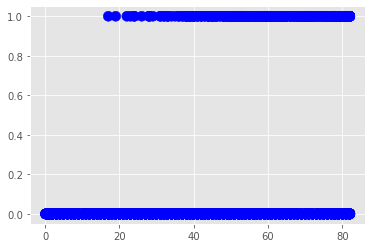

In [107]:
# from sklearn.datasets.samples_generator import make_blobs
# X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=100, cmap="bwr");
plt.show()


In [108]:
print(X.iloc[:, 0])

0       67.0
1       61.0
2       80.0
3       49.0
4       79.0
        ... 
5105    80.0
5106    81.0
5107    35.0
5108    51.0
5109    44.0
Name: age, Length: 5109, dtype: float64


In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [110]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
knn_model = KNeighborsClassifier()
knn_model

KNeighborsClassifier()

This is the KNN model to find the Nearest Neighbors

k: 1, Train/Test Score: 1.000/0.907
k: 3, Train/Test Score: 0.960/0.926
k: 5, Train/Test Score: 0.957/0.934
k: 7, Train/Test Score: 0.957/0.937
k: 9, Train/Test Score: 0.956/0.937
k: 11, Train/Test Score: 0.956/0.937
k: 13, Train/Test Score: 0.956/0.937
k: 15, Train/Test Score: 0.956/0.937
k: 17, Train/Test Score: 0.956/0.937
k: 19, Train/Test Score: 0.956/0.937


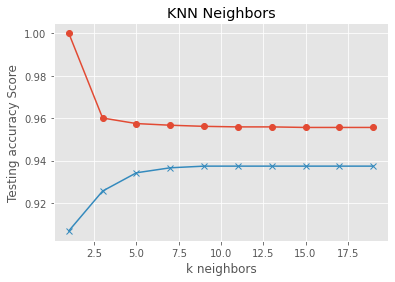

In [113]:
knn_train_scores = []
knn_test_scores = []
for k in range(1, 20, 2):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    knn_train_score = knn_model.score(X_train_scaled, y_train)
    knn_test_score = knn_model.score(X_test_scaled, y_test)
    knn_train_scores.append(knn_train_score)
    knn_test_scores.append(knn_test_score)
    print(f"k: {k}, Train/Test Score: {knn_train_score:.3f}/{knn_test_score:.3f}")
    
plt.plot(range(1, 20, 2), knn_train_scores, marker='o')
plt.plot(range(1, 20, 2), knn_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.title("KNN Neighbors")
plt.show()

In [114]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = knn_model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

    negative       0.94      1.00      0.97      1198
    positive       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



C:\Users\betsy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [115]:
confusion_matrix = confusion_matrix(y_test,predictions)

<ipython-input-116-c46e5cc6b0ba>:14: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_stroke = confusion_matrix[1,1] / sum(confusion_matrix[:,1])


Text(0.5, 1.0, 'KNN Model')

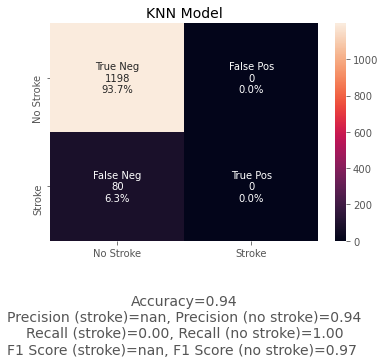

In [116]:
#Create an informative confusion matrix using seaborn
#Define variables for Information inside each box
category = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
counts = ['{0:0.0f}'.format(value) for value in confusion_matrix.flatten()]
percentages = ['{0:.1%}'.format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(category, counts, percentages)]
#Convert all of the labels to an array and reshape
labels = np.asarray(labels).reshape(2,2)
#Change the 0,1 to no stroke and stroke for labels
tick_labels = ['No Stroke', 'Stroke']
#Calculate all of the values to be displayed underneath the matrix as xlabel. Calculate precision, recall, F1 for both
#stroke and no stroke
accuracy  = np.trace(confusion_matrix) / float(np.sum(confusion_matrix))
precision_stroke = confusion_matrix[1,1] / sum(confusion_matrix[:,1])
recall_stroke    = confusion_matrix[1,1] / sum(confusion_matrix[1,:])
f1_score_stroke  = 2*precision_stroke*recall_stroke / (precision_stroke + recall_stroke)
precision = confusion_matrix[0,0] / sum(confusion_matrix[:,0])
recall    = confusion_matrix[0,0] / sum(confusion_matrix[0,:])
f1_score  = 2*precision*recall / (precision + recall)
#Set up the text for the x label display underneath the matrix
stats_text = "\n\nAccuracy={:0.2f}\nPrecision (stroke)={:0.2f}, Precision (no stroke)={:0.2f}\nRecall (stroke)={:0.2f}, Recall (no stroke)={:0.2f}\nF1 Score (stroke)={:0.2f}, F1 Score (no stroke)={:0.2f} ".format(accuracy,precision_stroke, precision, recall_stroke, recall, f1_score_stroke, f1_score)
#Make the seaborn heatmap
sns.heatmap(confusion_matrix, annot = labels, fmt = '', xticklabels = tick_labels, yticklabels = tick_labels)
plt.xlabel(stats_text, fontsize = 14)
plt.title("KNN Model", fontsize = 14)


In [117]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
knn_param_grid = {'n_neighbors': range(1, 20, 2)}
knn_grid = GridSearchCV(knn_model, knn_param_grid, verbose=3)

In [118]:
knn_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.919, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.928, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.922, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.920, total=   0.0s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... n_neighbors=1, score=0.931, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.950, total=   0.1s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.946, total=   0.1s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.954, total=   0.1s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.950, total=   0.1s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.950, total=   0.1s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.956, total=   0.1s
[CV] n_neighbors=5 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.1s finished


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=19),
             param_grid={'n_neighbors': range(1, 20, 2)}, verbose=3)

In [119]:
knn_grid.best_params_

{'n_neighbors': 15}

In [120]:
# Make predictions with the hypertuned model
knn_predictions = knn_grid.predict(X_test_scaled)
knn_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [121]:
print('Test Acc: %.3f' % knn_grid.score(X_test_scaled, y_test))

Test Acc: 0.937


In [122]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predictions,
                            target_names=["negative", "positive"]))

              precision    recall  f1-score   support

    negative       0.94      1.00      0.97      1198
    positive       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



C:\Users\betsy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc: 0.937


Neural Networks with Keras

In [125]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(42)

In [126]:
from tensorflow.keras.utils import to_categorical

In [127]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

Defining our Model Architecture (the layers)

In [128]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [129]:
from tensorflow.keras.layers import Dense
number_inputs = 15
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [130]:
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))

Model Summary

In [131]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 64        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


Compile the Model

In [132]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Training the Model

In [133]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
120/120 - 0s - loss: 0.6852 - accuracy: 0.7241
Epoch 2/1000
120/120 - 0s - loss: 0.3920 - accuracy: 0.8906
Epoch 3/1000
120/120 - 0s - loss: 0.2791 - accuracy: 0.9376
Epoch 4/1000
120/120 - 0s - loss: 0.2303 - accuracy: 0.9491
Epoch 5/1000
120/120 - 0s - loss: 0.2041 - accuracy: 0.9517
Epoch 6/1000
120/120 - 0s - loss: 0.1883 - accuracy: 0.9525
Epoch 7/1000
120/120 - 0s - loss: 0.1783 - accuracy: 0.9530
Epoch 8/1000
120/120 - 0s - loss: 0.1715 - accuracy: 0.9535
Epoch 9/1000
120/120 - 0s - loss: 0.1666 - accuracy: 0.9535
Epoch 10/1000
120/120 - 0s - loss: 0.1626 - accuracy: 0.9546
Epoch 11/1000
120/120 - 0s - loss: 0.1593 - accuracy: 0.9554
Epoch 12/1000
120/120 - 0s - loss: 0.1568 - accuracy: 0.9554
Epoch 13/1000
120/120 - 0s - loss: 0.1547 - accuracy: 0.9554
Epoch 14/1000
120/120 - 0s - loss: 0.1531 - accuracy: 0.9554
Epoch 15/1000
120/120 - 0s - loss: 0.1513 - accuracy: 0.9559
Epoch 16/1000
120/120 - 0s - loss: 0.1499 - accuracy: 0.9559
Epoch 17/1000
120/120 - 0s - loss

Epoch 135/1000
120/120 - 0s - loss: 0.1382 - accuracy: 0.9556
Epoch 136/1000
120/120 - 0s - loss: 0.1382 - accuracy: 0.9554
Epoch 137/1000
120/120 - 0s - loss: 0.1381 - accuracy: 0.9556
Epoch 138/1000
120/120 - 0s - loss: 0.1381 - accuracy: 0.9556
Epoch 139/1000
120/120 - 0s - loss: 0.1383 - accuracy: 0.9554
Epoch 140/1000
120/120 - 0s - loss: 0.1384 - accuracy: 0.9551
Epoch 141/1000
120/120 - 0s - loss: 0.1382 - accuracy: 0.9556
Epoch 142/1000
120/120 - 0s - loss: 0.1383 - accuracy: 0.9543
Epoch 143/1000
120/120 - 0s - loss: 0.1381 - accuracy: 0.9551
Epoch 144/1000
120/120 - 0s - loss: 0.1382 - accuracy: 0.9554
Epoch 145/1000
120/120 - 0s - loss: 0.1382 - accuracy: 0.9556
Epoch 146/1000
120/120 - 0s - loss: 0.1382 - accuracy: 0.9554
Epoch 147/1000
120/120 - 0s - loss: 0.1381 - accuracy: 0.9551
Epoch 148/1000
120/120 - 0s - loss: 0.1381 - accuracy: 0.9559
Epoch 149/1000
120/120 - 0s - loss: 0.1381 - accuracy: 0.9548
Epoch 150/1000
120/120 - 0s - loss: 0.1383 - accuracy: 0.9556
Epoch 15

120/120 - 0s - loss: 0.1359 - accuracy: 0.9561
Epoch 268/1000
120/120 - 0s - loss: 0.1359 - accuracy: 0.9559
Epoch 269/1000
120/120 - 0s - loss: 0.1359 - accuracy: 0.9564
Epoch 270/1000
120/120 - 0s - loss: 0.1360 - accuracy: 0.9556
Epoch 271/1000
120/120 - 0s - loss: 0.1358 - accuracy: 0.9559
Epoch 272/1000
120/120 - 0s - loss: 0.1359 - accuracy: 0.9559
Epoch 273/1000
120/120 - 0s - loss: 0.1359 - accuracy: 0.9561
Epoch 274/1000
120/120 - 0s - loss: 0.1358 - accuracy: 0.9559
Epoch 275/1000
120/120 - 0s - loss: 0.1359 - accuracy: 0.9559
Epoch 276/1000
120/120 - 0s - loss: 0.1358 - accuracy: 0.9561
Epoch 277/1000
120/120 - 0s - loss: 0.1358 - accuracy: 0.9559
Epoch 278/1000
120/120 - 0s - loss: 0.1357 - accuracy: 0.9559
Epoch 279/1000
120/120 - 0s - loss: 0.1356 - accuracy: 0.9559
Epoch 280/1000
120/120 - 0s - loss: 0.1357 - accuracy: 0.9559
Epoch 281/1000
120/120 - 0s - loss: 0.1357 - accuracy: 0.9556
Epoch 282/1000
120/120 - 0s - loss: 0.1356 - accuracy: 0.9559
Epoch 283/1000
120/120 

Epoch 400/1000
120/120 - 0s - loss: 0.1350 - accuracy: 0.9561
Epoch 401/1000
120/120 - 0s - loss: 0.1351 - accuracy: 0.9559
Epoch 402/1000
120/120 - 0s - loss: 0.1350 - accuracy: 0.9559
Epoch 403/1000
120/120 - 0s - loss: 0.1349 - accuracy: 0.9561
Epoch 404/1000
120/120 - 0s - loss: 0.1350 - accuracy: 0.9556
Epoch 405/1000
120/120 - 0s - loss: 0.1349 - accuracy: 0.9559
Epoch 406/1000
120/120 - 0s - loss: 0.1351 - accuracy: 0.9561
Epoch 407/1000
120/120 - 0s - loss: 0.1348 - accuracy: 0.9559
Epoch 408/1000
120/120 - 0s - loss: 0.1350 - accuracy: 0.9559
Epoch 409/1000
120/120 - 0s - loss: 0.1349 - accuracy: 0.9559
Epoch 410/1000
120/120 - 0s - loss: 0.1350 - accuracy: 0.9559
Epoch 411/1000
120/120 - 0s - loss: 0.1350 - accuracy: 0.9556
Epoch 412/1000
120/120 - 0s - loss: 0.1348 - accuracy: 0.9561
Epoch 413/1000
120/120 - 0s - loss: 0.1350 - accuracy: 0.9559
Epoch 414/1000
120/120 - 0s - loss: 0.1352 - accuracy: 0.9561
Epoch 415/1000
120/120 - 0s - loss: 0.1351 - accuracy: 0.9564
Epoch 41

120/120 - 0s - loss: 0.1348 - accuracy: 0.9561
Epoch 533/1000
120/120 - 0s - loss: 0.1348 - accuracy: 0.9559
Epoch 534/1000
120/120 - 0s - loss: 0.1346 - accuracy: 0.9561
Epoch 535/1000
120/120 - 0s - loss: 0.1348 - accuracy: 0.9559
Epoch 536/1000
120/120 - 0s - loss: 0.1348 - accuracy: 0.9556
Epoch 537/1000
120/120 - 0s - loss: 0.1345 - accuracy: 0.9559
Epoch 538/1000
120/120 - 0s - loss: 0.1347 - accuracy: 0.9561
Epoch 539/1000
120/120 - 0s - loss: 0.1349 - accuracy: 0.9561
Epoch 540/1000
120/120 - 0s - loss: 0.1347 - accuracy: 0.9559
Epoch 541/1000
120/120 - 0s - loss: 0.1349 - accuracy: 0.9559
Epoch 542/1000
120/120 - 0s - loss: 0.1346 - accuracy: 0.9559
Epoch 543/1000
120/120 - 0s - loss: 0.1349 - accuracy: 0.9561
Epoch 544/1000
120/120 - 0s - loss: 0.1348 - accuracy: 0.9561
Epoch 545/1000
120/120 - 0s - loss: 0.1349 - accuracy: 0.9559
Epoch 546/1000
120/120 - 0s - loss: 0.1348 - accuracy: 0.9564
Epoch 547/1000
120/120 - 0s - loss: 0.1348 - accuracy: 0.9559
Epoch 548/1000
120/120 

Epoch 665/1000
120/120 - 0s - loss: 0.1345 - accuracy: 0.9559
Epoch 666/1000
120/120 - 0s - loss: 0.1349 - accuracy: 0.9564
Epoch 667/1000
120/120 - 0s - loss: 0.1347 - accuracy: 0.9556
Epoch 668/1000
120/120 - 0s - loss: 0.1345 - accuracy: 0.9556
Epoch 669/1000
120/120 - 0s - loss: 0.1349 - accuracy: 0.9559
Epoch 670/1000
120/120 - 0s - loss: 0.1346 - accuracy: 0.9561
Epoch 671/1000
120/120 - 0s - loss: 0.1346 - accuracy: 0.9559
Epoch 672/1000
120/120 - 0s - loss: 0.1346 - accuracy: 0.9556
Epoch 673/1000
120/120 - 0s - loss: 0.1345 - accuracy: 0.9559
Epoch 674/1000
120/120 - 0s - loss: 0.1348 - accuracy: 0.9561
Epoch 675/1000
120/120 - 0s - loss: 0.1348 - accuracy: 0.9559
Epoch 676/1000
120/120 - 0s - loss: 0.1344 - accuracy: 0.9556
Epoch 677/1000
120/120 - 0s - loss: 0.1346 - accuracy: 0.9559
Epoch 678/1000
120/120 - 0s - loss: 0.1347 - accuracy: 0.9561
Epoch 679/1000
120/120 - 0s - loss: 0.1345 - accuracy: 0.9559
Epoch 680/1000
120/120 - 0s - loss: 0.1345 - accuracy: 0.9559
Epoch 68

120/120 - 0s - loss: 0.1342 - accuracy: 0.9556
Epoch 798/1000
120/120 - 0s - loss: 0.1341 - accuracy: 0.9559
Epoch 799/1000
120/120 - 0s - loss: 0.1342 - accuracy: 0.9561
Epoch 800/1000
120/120 - 0s - loss: 0.1342 - accuracy: 0.9561
Epoch 801/1000
120/120 - 0s - loss: 0.1341 - accuracy: 0.9556
Epoch 802/1000
120/120 - 0s - loss: 0.1343 - accuracy: 0.9559
Epoch 803/1000
120/120 - 0s - loss: 0.1340 - accuracy: 0.9559
Epoch 804/1000
120/120 - 0s - loss: 0.1341 - accuracy: 0.9556
Epoch 805/1000
120/120 - 0s - loss: 0.1341 - accuracy: 0.9559
Epoch 806/1000
120/120 - 0s - loss: 0.1341 - accuracy: 0.9559
Epoch 807/1000
120/120 - 0s - loss: 0.1342 - accuracy: 0.9559
Epoch 808/1000
120/120 - 0s - loss: 0.1341 - accuracy: 0.9559
Epoch 809/1000
120/120 - 0s - loss: 0.1342 - accuracy: 0.9559
Epoch 810/1000
120/120 - 0s - loss: 0.1341 - accuracy: 0.9559
Epoch 811/1000
120/120 - 0s - loss: 0.1342 - accuracy: 0.9559
Epoch 812/1000
120/120 - 0s - loss: 0.1342 - accuracy: 0.9559
Epoch 813/1000
120/120 

Epoch 930/1000
120/120 - 0s - loss: 0.1341 - accuracy: 0.9556
Epoch 931/1000
120/120 - 0s - loss: 0.1340 - accuracy: 0.9561
Epoch 932/1000
120/120 - 0s - loss: 0.1342 - accuracy: 0.9561
Epoch 933/1000
120/120 - 0s - loss: 0.1341 - accuracy: 0.9564
Epoch 934/1000
120/120 - 0s - loss: 0.1340 - accuracy: 0.9559
Epoch 935/1000
120/120 - 0s - loss: 0.1344 - accuracy: 0.9559
Epoch 936/1000
120/120 - 0s - loss: 0.1339 - accuracy: 0.9556
Epoch 937/1000
120/120 - 0s - loss: 0.1341 - accuracy: 0.9559
Epoch 938/1000
120/120 - 0s - loss: 0.1342 - accuracy: 0.9559
Epoch 939/1000
120/120 - 0s - loss: 0.1341 - accuracy: 0.9556
Epoch 940/1000
120/120 - 0s - loss: 0.1339 - accuracy: 0.9559
Epoch 941/1000
120/120 - 0s - loss: 0.1339 - accuracy: 0.9559
Epoch 942/1000
120/120 - 0s - loss: 0.1339 - accuracy: 0.9559
Epoch 943/1000
120/120 - 0s - loss: 0.1340 - accuracy: 0.9559
Epoch 944/1000
120/120 - 0s - loss: 0.1340 - accuracy: 0.9561
Epoch 945/1000
120/120 - 0s - loss: 0.1340 - accuracy: 0.9561
Epoch 94

Quantifying the Model

In [134]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

40/40 - 0s - loss: 0.2071 - accuracy: 0.9366
Loss: 0.20714952051639557, Accuracy: 0.9366196990013123
